In [1]:
# Requiured dependencies
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import os
import hvplot
import hvplot.pandas

1.Is a countries happiness score correlated to the countries GDP per capita in 2023? (Jean)

2.Does a countries predicted life expectancy affect the happiness score in 2023 ?
(Sin)


In [2]:
# Read saved data
dataframe_2023_subset = pd.read_csv("Output/Clean_2023.csv")

# Display sample data
dataframe_2023_subset.head()

,Country name,Ladder score,Logged GDP per capita,Healthy life expectancy
0,Finland,7.804,10.792,71.150
1,Denmark,7.586,10.962,71.250
2,Iceland,7.530,10.896,72.050
3,Israel,7.473,10.639,72.697
4,Netherlands,7.403,10.942,71.550


In [3]:
# Check for NaN values in the DataFrame
nan_values = dataframe_2023_subset[dataframe_2023_subset.isnull().any(axis=1)]

# Display rows with NaN values
print("Rows with NaN values:")
print(nan_values)
# Remove rows with NaN values
dataframe_2023_subset_clean = dataframe_2023_subset.dropna()

# Display the cleaned DataFrame
print("DataFrame after removing rows with NaN values:")
dataframe_2023_subset_clean.head()

Rows with NaN values:
          Country name  Ladder score  Logged GDP per capita  \
98  State of Palestine         4.908                  8.716   

    Healthy life expectancy  
98                      NaN  
DataFrame after removing rows with NaN values:


,Country name,Ladder score,Logged GDP per capita,Healthy life expectancy
0,Finland,7.804,10.792,71.150
1,Denmark,7.586,10.962,71.250
2,Iceland,7.530,10.896,72.050
3,Israel,7.473,10.639,72.697
4,Netherlands,7.403,10.942,71.550


The r-squared is: 0.5579016766408209
The population variance using the NumPy module is 32.82384960012977
The population standard deviation using the NumPy module is 5.729210207361026


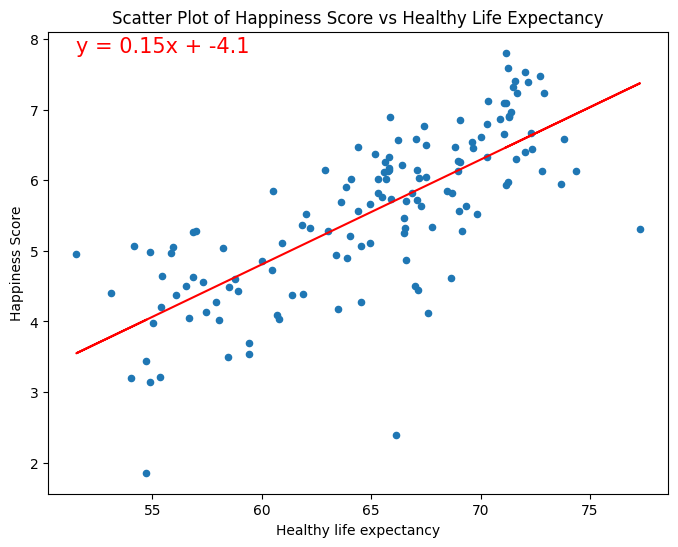

In [4]:
x_values = dataframe_2023_subset_clean['Healthy life expectancy']
y_values = dataframe_2023_subset_clean['Ladder score']

# Calculate linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
dataframe_2023_subset_clean.plot(kind="scatter", 
                           x="Healthy life expectancy", 
                           y="Ladder score", 
                           title="Scatter Plot of Happiness Score vs Healthy Life Expectancy",
                           figsize=(8, 6))

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")

# Set x-label to "Happiness Score"
plt.ylabel("Happiness Score")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# calculate variance and std for the "life expectancy" column
life_expectancy_column = dataframe_2023_subset['Healthy life expectancy']

# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(life_expectancy_column, ddof=0)
print(f"The population variance using the NumPy module is {var_numpy}")

# Calculate the standard deviation using NumPy
sd_numpy = np.std(life_expectancy_column, ddof=0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

# Show plot
plt.show()


**Discussion about the linear relationship:**
The linear relationship between hapiness score and life expectancy can be observed in the scatter plot and linear regression analysis. As happiness score increases, the life expectancy seems to be increasing. This positive correlation is evident from the upward trend of the regression line, indicating that countries with higher happiness score have a higher life expectancy. 

In [17]:
# Create a scatter plot using hvplot.points with customized parameters
scatter_plot1 = dataframe_2023_subset_clean.hvplot.points(
    x="Country name",
    y="Healthy life expectancy",
    hover_cols=["Country name", "Healthy life expectancy", "Ladder score"],
    title="Scatter Plot of Happiness score by Country",
    xlabel="Country name",
    ylabel="Happiness score",
    grid=True,
    line_color="black",
    marker="o",
    size=10,
    fontsize={"xlabel": 10, "ylabel": 10, "title": 14},
    rot=90,
)

# Save the plot as an HTML file
hvplot.save(scatter_plot1, "Healthy Life Expectancy by Country.html")

# Show the plot
scatter_plot1


:Points   [Country name,Healthy life expectancy]   (Ladder score)

In [18]:
# Create a scatter plot using hvplot.points with customized parameters
scatter_plot2 = dataframe_2023_subset_clean.hvplot.points(
    x="Healthy life expectancy",
    y="Ladder score",
    hover_cols=["Country name", "Healthy life expectancy","Ladder score"],
    title="Scatter Plot of Healthy Life Expectancy V/S Happiness score",
    xlabel="Happiness score",
    ylabel="Healthy life expectancy",
    grid=True,  
    line_color="black",  
    marker="o",  
    size=10, 
    fontsize={"xlabel": 10, "ylabel": 10, "title": 14},
    rot=90,  
)

# Save the plot
hvplot.save(scatter_plot2, "Healthy Life Expectancy Vs Happiness score.html")

# Show the plot
scatter_plot2

:Points   [Healthy life expectancy,Ladder score]   (Country name)

3.Which continent is the happiest in 2023? 
(Uma)


4.Does Australia, Spain, China and the USA get happier over 2021-2024?
(Kristina)

5.Is there a correlation between a country's unemployment rate and its national happiness score?
(Kelela)
